# Setup

In [3]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Q1.a

In [4]:
def denoise_image(image):
    """
    Denoises the input image.
    ----------
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result denoised image.   
    """

    denoised = image.copy()
    
    height = denoised.shape[0]
    width = denoised.shape[1]
    
    # Convert to freq domain
    denoised = np.fft.fft2(denoised)
    plt.imshow(np.abs(denoised), norm=LogNorm(vmin=5))
    plt.title("noisy image in freq domain")
    plt.show()
    
    # Remove 80% of middle freqs and keep 10% of beginning and 10% of ending freqs (because of circularity of freqs)
    keep_ratio = 0.1
    denoised[int(height * keep_ratio):int(height * (1 - keep_ratio))] = 0
    denoised[:, int(width * keep_ratio):int(width * (1 - keep_ratio))] = 0
    plt.imshow(np.abs(denoised), norm=LogNorm(vmin=5))
    plt.title("noisy image in freq domain after cutting some freqs")    
    plt.show()
    
    # Convert back to space domain
    denoised = np.fft.ifft2(denoised).real
    return denoised

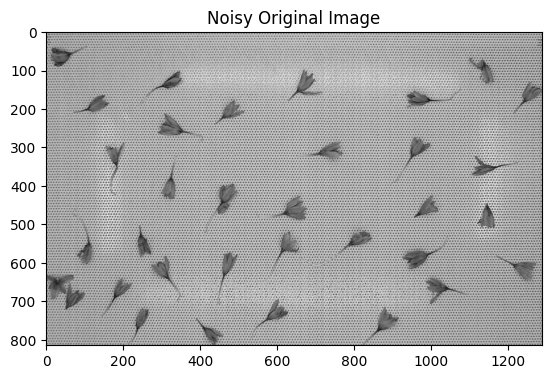

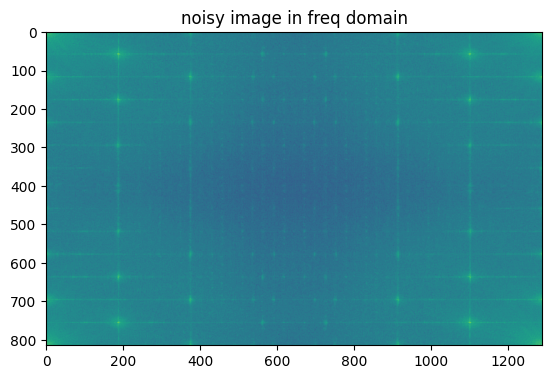

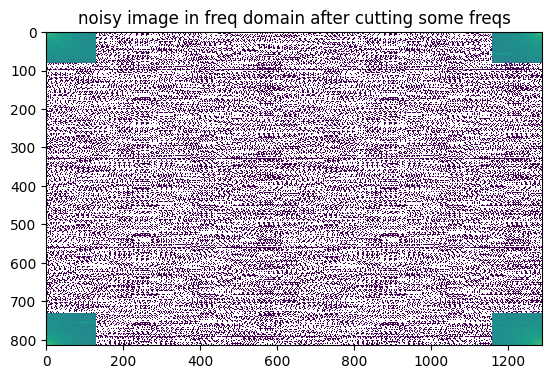

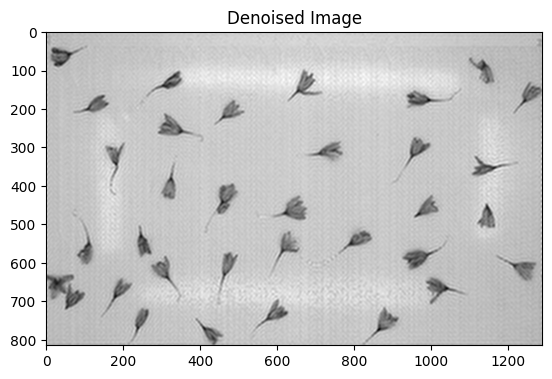

In [5]:
noisy_image = cv2.imread("images/img_01.jpg", 0)
plt.imshow(noisy_image, cmap="gray")
plt.title("Noisy Original Image")
plt.show()

denoised_image = denoise_image(noisy_image)
plt.imshow(denoised_image, cmap="gray")
plt.title("Denoised Image")
plt.show()

# Q1.b

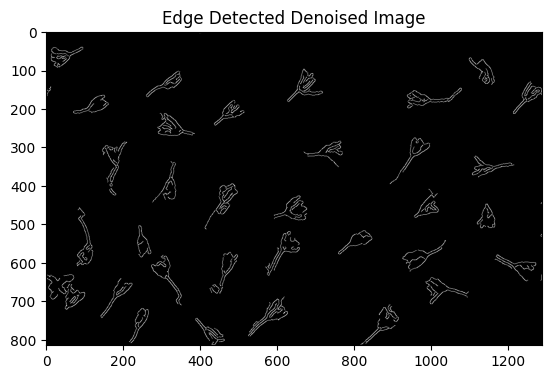

In [6]:
img_edge = cv2.Canny(np.uint8(denoised_image), 1, 110)
plt.imshow(img_edge, cmap="gray")
plt.title("Edge Detected Denoised Image")
plt.show()

# Q1.c

In [14]:
dy, dx = np.gradient(img_edge.astype(np.float64))
degrees = np.degrees(np.arctan2(dy, dx))